In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
from google.colab import files
uploaded=files.upload()

Saving heart_disease.xlsx to heart_disease.xlsx


In [3]:
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
# Check the shape of the dataset
print("Dataset shape:", df.shape)

# Display basic statistics
print('\n', df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (908, 13)

               age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

Missing values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


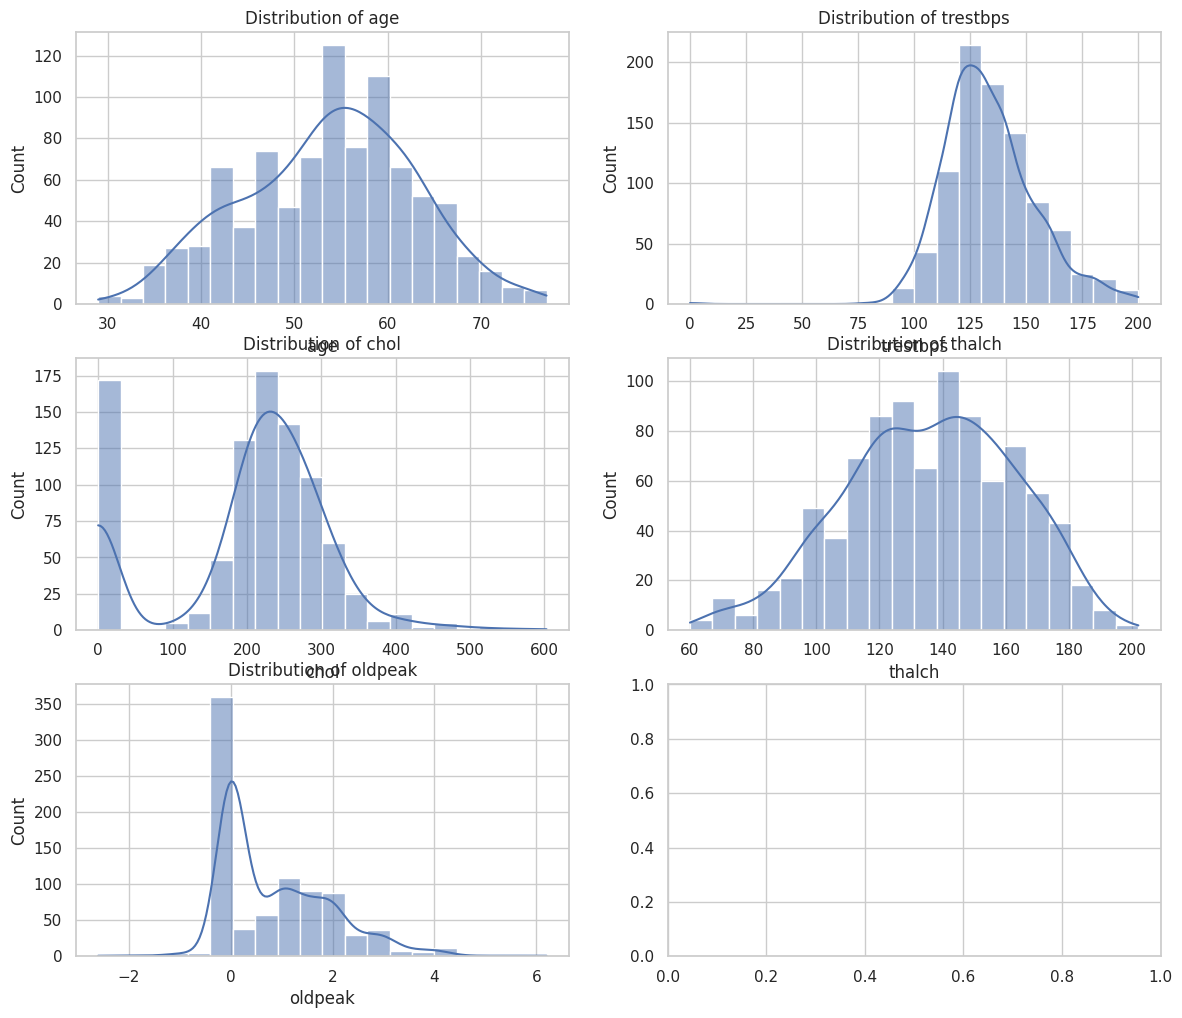

In [6]:
import seaborn as sns
sns.set(style="whitegrid")

# Plot histograms for numerical features
numeric_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Create histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {column}')
    axes[i//2, i%2].set_xlabel(column)

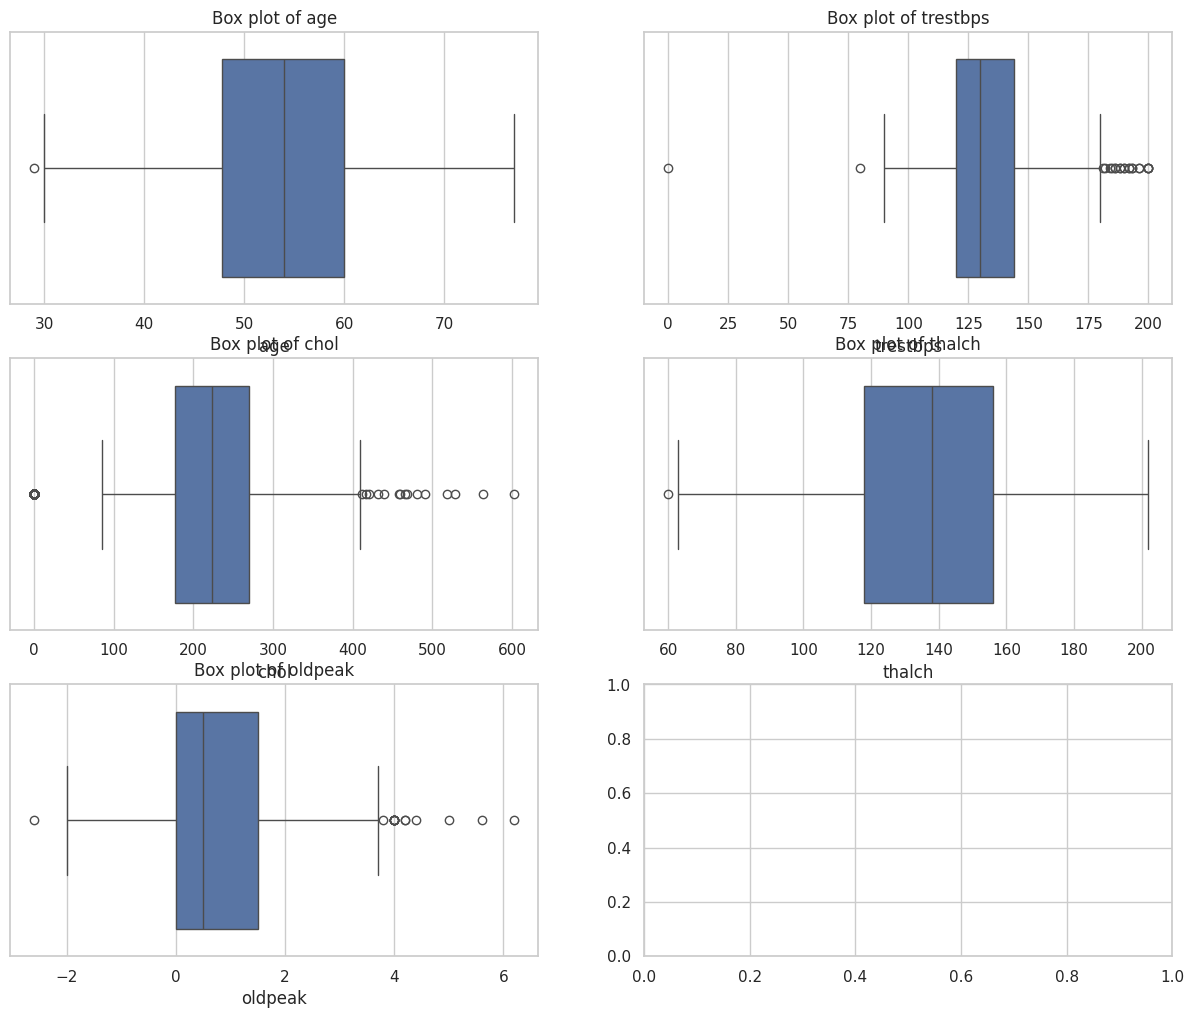

In [7]:
# Box plots for outlier detection
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Box plot of {column}')

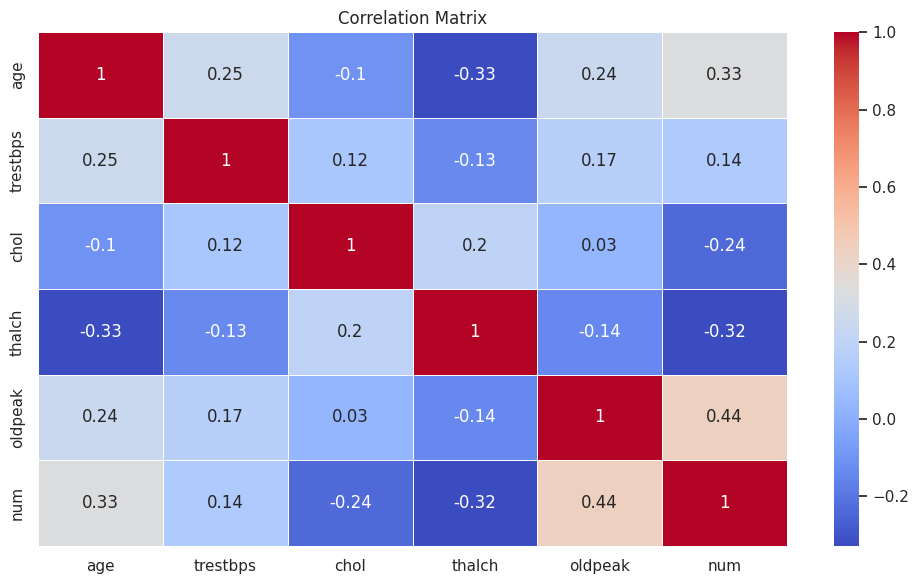

In [8]:
# Correlation matrix heatmap for numeric variables
corr_matrix = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")

plt.tight_layout()
plt.show()

In [9]:
def find_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers.tolist()

# Find outliers for numerical features
for col in df.select_dtypes(include=['number']).columns:
  outliers = find_outliers_iqr(df[col])
  if outliers:
    print(f"Outliers in {col}: {outliers}")

Outliers in age: [29]
Outliers in trestbps: [80, 190, 181, 188, 193, 196, 192, 185, 200, 184, 192, 186, 200, 200, 200, 188, 0, 182, 196, 193, 186, 190]
Outliers in chol: [417, 439, 0, 564, 0, 0, 458, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 481, 0, 459, 432, 468, 412, 421, 0, 0, 0, 0, 0, 0, 466, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 603, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 518, 529, 491, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Outliers in thalch: [60]
Outliers in oldpeak: [4.2, -2.6, 4.0, 5.0, 4.0, 4.0, 6.2, 5.6, 4.0, 4.2, 4.0, 4.4, 4.0, 3.8, 4.0, 4.0]


In [10]:
# Handling missing values for 'oldpeak' by imputing with the median
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

# Scaling numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Display the first few rows of the processed dataset
df_encoded.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,True,0.524183,1.354403,0,True,False,False,True,False,False,False,False,False,False,False,False,False
1,-1.397560,0.076967,0.013526,False,-0.147705,-0.815718,0,True,True,False,False,True,False,False,False,False,True,False,False,False
2,0.350503,0.322181,-0.084656,False,0.449529,-0.438305,0,True,False,False,False,True,False,False,False,False,True,False,False,False
3,-0.195767,-0.756760,-0.138211,False,2.017268,-0.815718,0,True,False,False,True,False,False,False,False,False,True,False,False,False
4,0.350503,-1.149102,-0.004325,False,-0.371668,0.599578,0,True,False,False,False,True,False,True,False,False,True,False,False,False


In [11]:
# Encoding categorical variables
label_encoder = preprocessing.LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
  # Convert all values to strings before encoding
  df[col] = df[col].astype(str)
  df[col] = label_encoder.fit_transform(df[col])
print('Displaying the encoded dataframe:')
print(df)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['number']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print('Displaying the scaled dataframe:')
print(df)

Displaying the encoded dataframe:
     age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3       145   233   True        0     150      1      2.3   
1     41    1   1       135   203  False        1     132      1      0.0   
2     57    1   0       140   192  False        1     148      1      0.4   
3     52    1   3       118   186  False        0     190      1      0.0   
4     57    1   0       110   201  False        1     126      3      1.5   
..   ...  ...  ..       ...   ...    ...      ...     ...    ...      ...   
903   53    1   0       125     0  False        1     120      1      1.5   
904   62    1   0       166   170  False        2     120      3      3.0   
905   56    1   2       170     0  False        0     123      3      2.5   
906   56    1   2       144   208   True        2     105      2      0.5   
907   57    1   0       142   277   True        2     182      0      0.5   

     slope  thal  num  
0        0     0 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Split the dataset into features (X) and target (y)
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import label_binarize
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get the probabilities for ROC-AUC

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Binarize the output labels for multi-class ROC-AUC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
# Calculate ROC-AUC for each class and then take the average
roc_auc = roc_auc_score(y_test_binarized, clf.predict_proba(X_test), multi_class='ovr')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.46703296703296704
Precision: 0.4704837986754721
Recall: 0.46703296703296704
F1-score: 0.4674986855250014
ROC-AUC: 0.5674733494455724
Confusion Matrix:
[[61 22  1  4  1]
 [16 16  6  8  2]
 [ 3  8  4  6  1]
 [ 4  5  4  4  0]
 [ 3  1  1  1  0]]


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance with the best parameters
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Accuracy: 0.5659340659340659
Precision: 0.467417836576715
Recall: 0.5659340659340659
F1-score: 0.5089141008541157


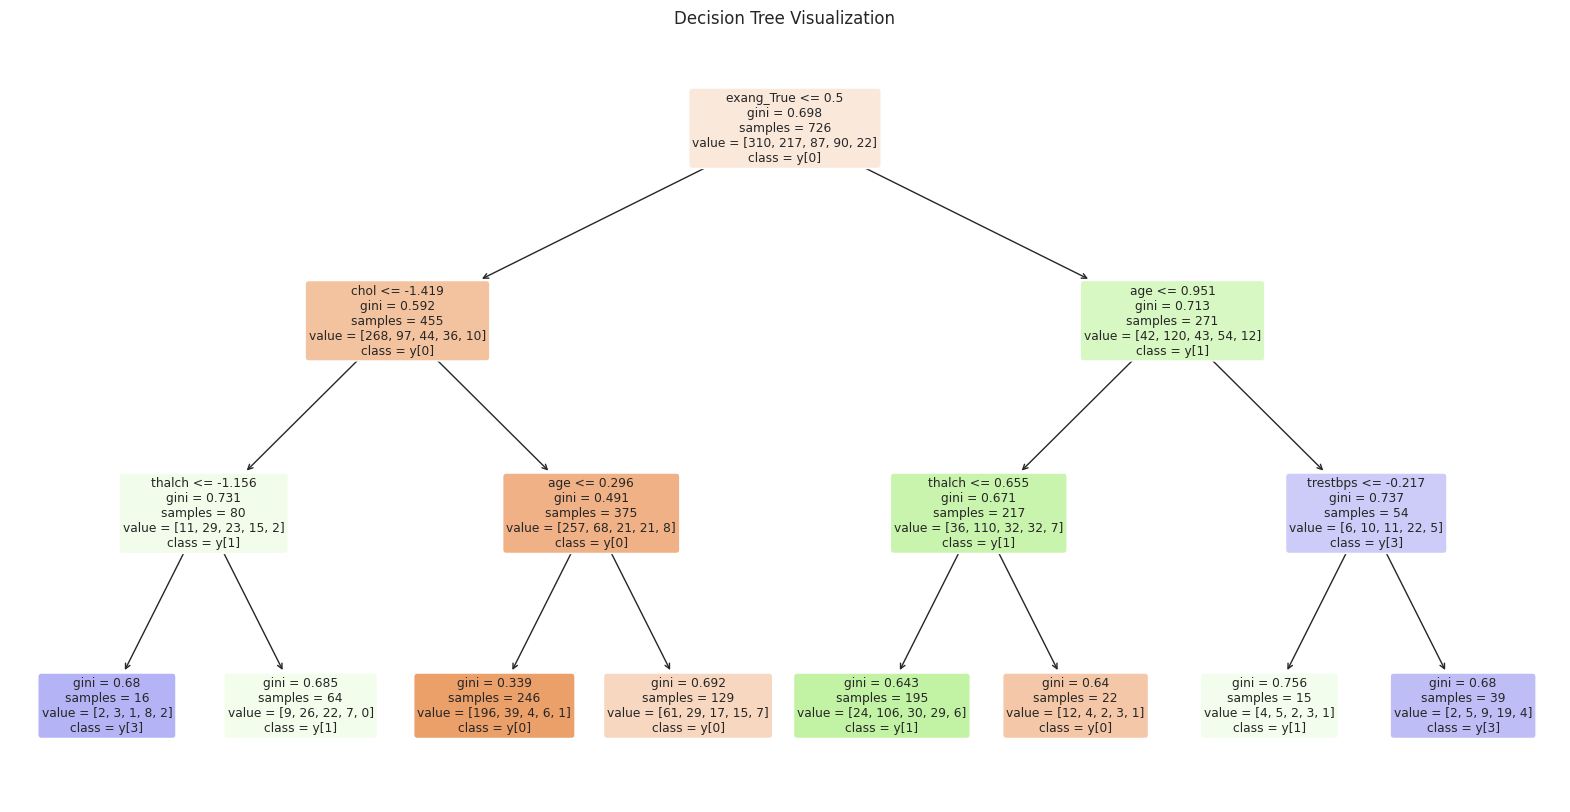

In [18]:
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(best_model, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

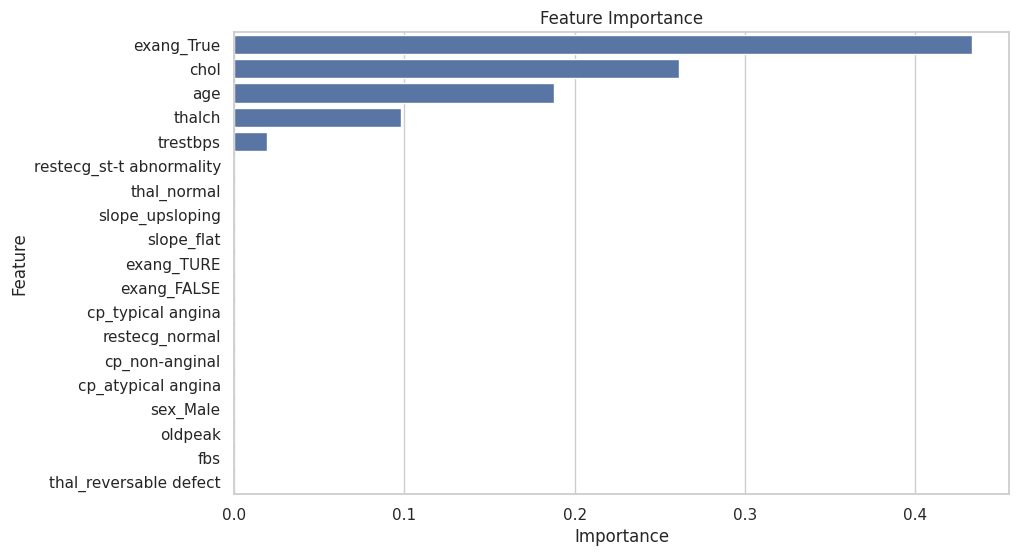

In [19]:
# Get feature importance
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()

**Analyse the performance of the Decision Tree model using the evaluation metrics obtained.**

1. Accuracy: 0.57 (57%)

The model correctly predicts approximately 57% of the test samples. This accuracy is relatively low, suggesting that the model is not capturing the relationships in the data very well. Given that the target is likely multi-class (as per the heart disease dataset), this is a moderate performance but could be much better.

2. Precision: 0.47 (47%)

The precision score indicates that only 47% of the samples predicted as positive are actually positive. This suggests that the model is generating a relatively high number of false positives (cases incorrectly classified as positive).

3. Recall: 0.57 (57%)

The recall score shows that 57% of the actual positive samples are correctly identified by the model. While this means the model is reasonably good at identifying positive cases, the recall is only moderate, indicating some true positives are being missed (false negatives).

4. F1-Score: 0.51 (51%)

The F1-score, which balances precision and recall, is 51%. This suggests that the model is somewhat imbalanced in managing false positives and false negatives. While not terrible, it indicates there is room for significant improvement, particularly in getting the model to handle both types of errors equally well.
